# Import Python Packages & Libraries

In [1]:
import geopandas as gpd
import matplotlib.colors as colors
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
from scipy.signal import savgol_filter
from astropy.modeling import models, fitting
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab as py
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from IPython.display import display_html 
from shapely.geometry import Point, Polygon

class BOLD:
   B_start = '\033[1m'
   B_end = '\033[0m'
class UNDERLINE:
    U_start = '\033[4m'
    U_end = '\033[0m'

# Fine particulate matter (PM10)

### Line Plots (2017, 2018)

New York    365
Queens      365
Bronx       365
Name: COUNTY, dtype: int64


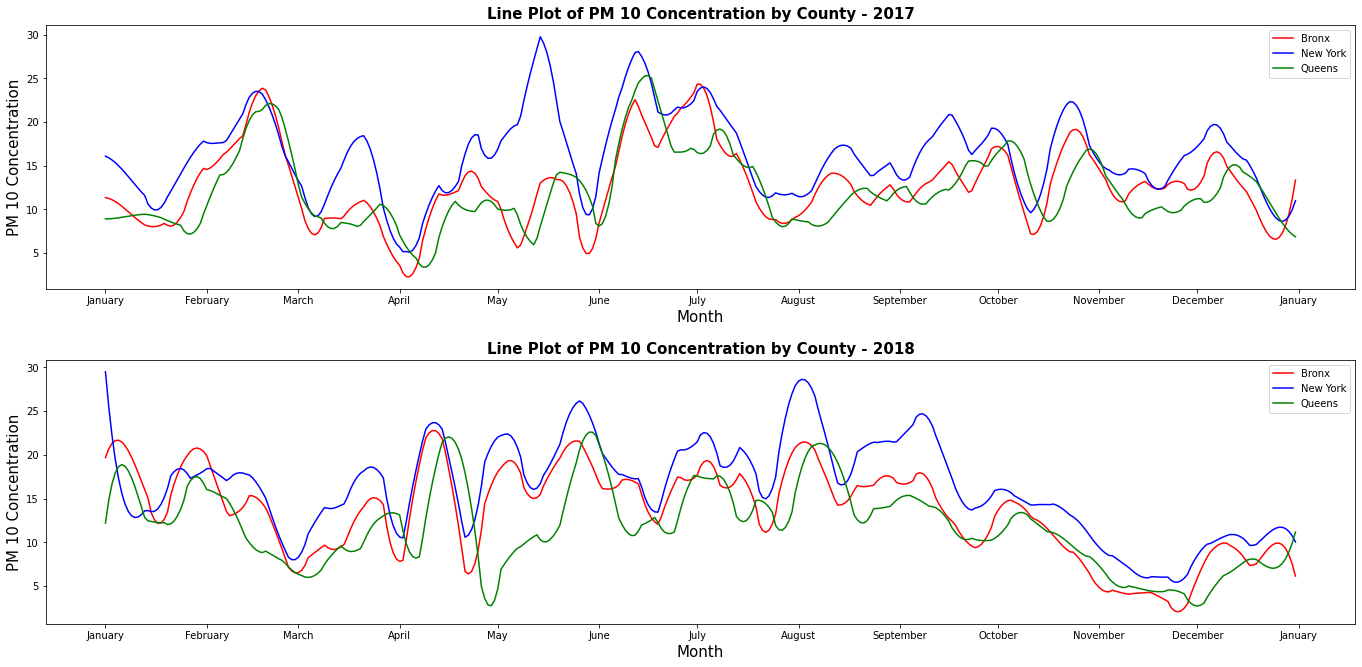

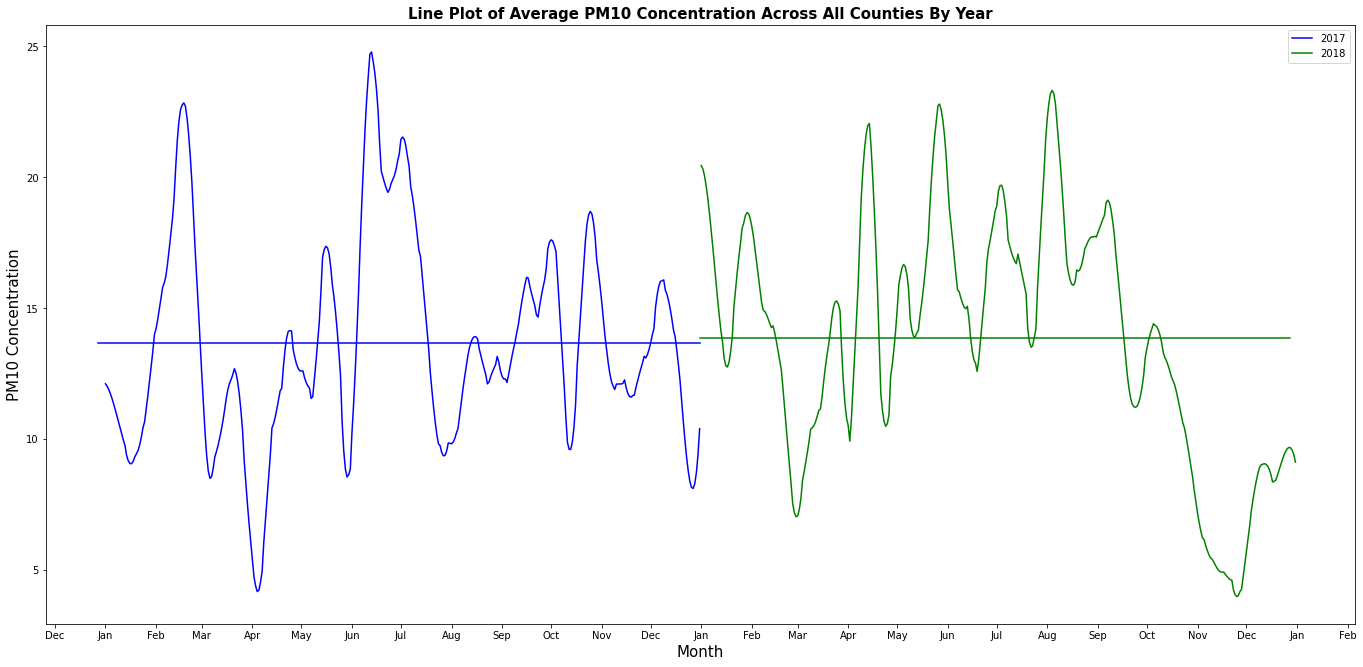

In [9]:
PM10_2017 = pd.read_csv("/Users/wwaynerichards/Desktop/Biomedical Informatics Degree/Data Wrangling/Group Project/AQI Data/PM10/PM10.2017.All_Sites_NEW.csv")
PM10_2018 = pd.read_csv("/Users/wwaynerichards/Desktop/Biomedical Informatics Degree/Data Wrangling/Group Project/AQI Data/PM10/PM10.2018.All_Sites_NEW.csv")

print(PM10_2017["COUNTY"].value_counts())

# Bronx PM 10 (2017, 2018)
BRONX_PM10_2017 = PM10_2017[PM10_2017["COUNTY"] == "Bronx"]
BRONX_PM10_2018 = PM10_2018[PM10_2018["COUNTY"] == "Bronx"]

BRONX_COMBINED = pd.DataFrame()
BRONX_COMBINED = pd.concat([BRONX_PM10_2017.reset_index(drop = True, inplace = False),
                            BRONX_PM10_2018.reset_index(drop = True, inplace = False)], axis = 0, ignore_index = True)

# New York PM 10 (2017, 2018)
NY_PM10_2017 = PM10_2017[PM10_2017["COUNTY"] == "New York"]
NY_PM10_2018 = PM10_2018[PM10_2018["COUNTY"] == "New York"]

NY_COMBINED = pd.DataFrame()
NY_COMBINED = pd.concat([NY_PM10_2017.reset_index(drop = True, inplace = False),
                         NY_PM10_2018.reset_index(drop = True, inplace = False)], axis = 0, ignore_index = True)

# Queens PM 10 (2017, 2018)
QUEENS_PM10_2017 = PM10_2017[PM10_2017["COUNTY"] == "Queens"]
QUEENS_PM10_2018 = PM10_2018[PM10_2018["COUNTY"] == "Queens"]

QUEENS_COMBINED = pd.DataFrame()
QUEENS_COMBINED = pd.concat([QUEENS_PM10_2017.reset_index(drop = True, inplace = False),
                             QUEENS_PM10_2018.reset_index(drop = True, inplace = False)], axis = 0, ignore_index = True)

PM10_2017_MEAN = PM10_2017.groupby(PM10_2017["DATE"])["AQI_CONC"].mean()
PM10_2018_MEAN = PM10_2018.groupby(PM10_2018["DATE"])["AQI_CONC"].mean()

# Line Plot Overlaying Each County for PM 10 in 2017 & 2018
fig, (ax1, ax2)  = plt.subplots(2, 1, sharey = "row", figsize = (20,10))
fig.tight_layout(pad = 5.0)
windowSize = 25
polyOrder = 3
legend_labels = ["Bronx","New York","Queens"]

# 2017
smoothed = savgol_filter(BRONX_PM10_2017["AQI_CONC"], windowSize, polyOrder)
ax1.plot(BRONX_PM10_2017["DATE"], smoothed, color = "red")
smoothed = savgol_filter(NY_PM10_2017["AQI_CONC"], windowSize, polyOrder)
ax1.plot(NY_PM10_2017["DATE"], smoothed, color = "blue")
smoothed = savgol_filter(QUEENS_PM10_2017["AQI_CONC"], windowSize, polyOrder)
ax1.plot(QUEENS_PM10_2017["DATE"], smoothed, color = "green")
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%B"))
ax1.set_title("Line Plot of PM 10 Concentration by County - 2017", fontweight = "bold", size = 15)
ax1.set_ylabel("PM 10 Concentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)
ax1.legend(labels = legend_labels)

# 2018
smoothed = savgol_filter(BRONX_PM10_2018["AQI_CONC"], windowSize, polyOrder)
ax2.plot(BRONX_PM10_2018["DATE"], smoothed, color = "red")
smoothed = savgol_filter(NY_PM10_2018["AQI_CONC"], windowSize, polyOrder)
ax2.plot(NY_PM10_2018["DATE"], smoothed, color = "blue")
smoothed = savgol_filter(QUEENS_PM10_2018["AQI_CONC"], windowSize, polyOrder)
ax2.plot(QUEENS_PM10_2018["DATE"], smoothed, color = "green")
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%B"))
ax2.set_title("Line Plot of PM 10 Concentration by County - 2018", fontweight = "bold", size = 15)
ax2.set_ylabel("PM 10 Concentration", fontsize = 15)
ax2.set_xlabel("Month", fontsize = 15)
ax2.legend(labels = legend_labels)
plt.show()

# Averaged By Year (2017, 2018)
PM10_2017_MEAN = PM10_2017.groupby(PM10_2017["DATE"])["AQI_CONC"].mean().reset_index()
PM10_2018_MEAN = PM10_2018.groupby(PM10_2018["DATE"])["AQI_CONC"].mean().reset_index()

# Averaged By Year (2017, 2018)
fig, ax1  = plt.subplots(1, 1, sharey = "row", figsize = (20,10))
fig.tight_layout(pad = 5.0)
windowSize = 25
polyOrder = 3
legend_labels = ["2017","2018"]

# Averaged By Year (2017, 2018)
smoothed = savgol_filter(PM10_2017_MEAN["AQI_CONC"], windowSize, polyOrder)
ax1.plot(PM10_2017_MEAN["DATE"], smoothed, color = "blue")
smoothed = savgol_filter(PM10_2018_MEAN["AQI_CONC"], windowSize, polyOrder)
ax1.plot(PM10_2018_MEAN["DATE"], smoothed, color = "green")
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax1.set_title("Line Plot of Average PM10 Concentration Across All Counties By Year", fontweight = "bold", size = 15)
ax1.set_ylabel("PM10 Concentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)
ax1.legend(labels = legend_labels)
ax1.axhline(y = PM10_2017_MEAN["AQI_CONC"].mean(), color = "blue", linestyle = '-', xmin = 0.04, xmax = 0.50)
ax1.axhline(y = PM10_2018_MEAN["AQI_CONC"].mean(), color = "green", linestyle = '-', xmin = 0.50, xmax = 0.95)

plt.show()

### Descriptive Statistics

In [11]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

print(BOLD.B_start+UNDERLINE.U_start+"Descriptive Stats - PM 10; Bronx"+UNDERLINE.U_end+BOLD.B_end)
display_side_by_side([pd.DataFrame(BRONX_PM10_2017["AQI_CONC"].describe()),
                      pd.DataFrame(BRONX_PM10_2018["AQI_CONC"].describe()),
                      pd.DataFrame(BRONX_COMBINED["AQI_CONC"].describe())], 
                     ["Bronx - 2017",
                      "Bronx - 2018",
                      "Bronx - Combined"])

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"Descriptive Stats - PM 10; New York"+UNDERLINE.U_end+BOLD.B_end)
display_side_by_side([pd.DataFrame(NY_PM10_2017["AQI_CONC"].describe()),
                      pd.DataFrame(NY_PM10_2018["AQI_CONC"].describe()),
                      pd.DataFrame(NY_COMBINED["AQI_CONC"].describe())], 
                     ["New York - 2017",
                      "New York - 2018",
                      "New York - Combined"])
print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"Descriptive Stats - PM 10; Queens"+UNDERLINE.U_end+BOLD.B_end)
display_side_by_side([pd.DataFrame(QUEENS_PM10_2017["AQI_CONC"].describe()),
                      pd.DataFrame(QUEENS_PM10_2018["AQI_CONC"].describe()),
                      pd.DataFrame(QUEENS_COMBINED["AQI_CONC"].describe())], 
                     ["Queens - 2017",
                      "Queens - 2018",
                      "Queens - Combined"])

Descriptive Stats - PM 10; Bronx


,AQI_CONC
count,365.000000
mean,12.679452
std,6.742415
min,3.000000
25%,8.000000
50%,11.000000
75%,17.000000
max,34.000000
,AQI_CONC
count,365.000000


_________________________________________________________________________________


Descriptive Stats - PM 10; New York


,AQI_CONC
count,365.000000
mean,16.158904
std,7.052547
min,6.000000
25%,11.000000
50%,14.000000
75%,21.000000
max,35.000000
,AQI_CONC
count,365.000000


_________________________________________________________________________________


Descriptive Stats - PM 10; Queens


,AQI_CONC
count,365.000000
mean,12.147945
std,6.157728
min,3.000000
25%,8.000000
50%,11.000000
75%,16.000000
max,30.000000
,AQI_CONC
count,365.000000


### Box Plots (2017, 2018)

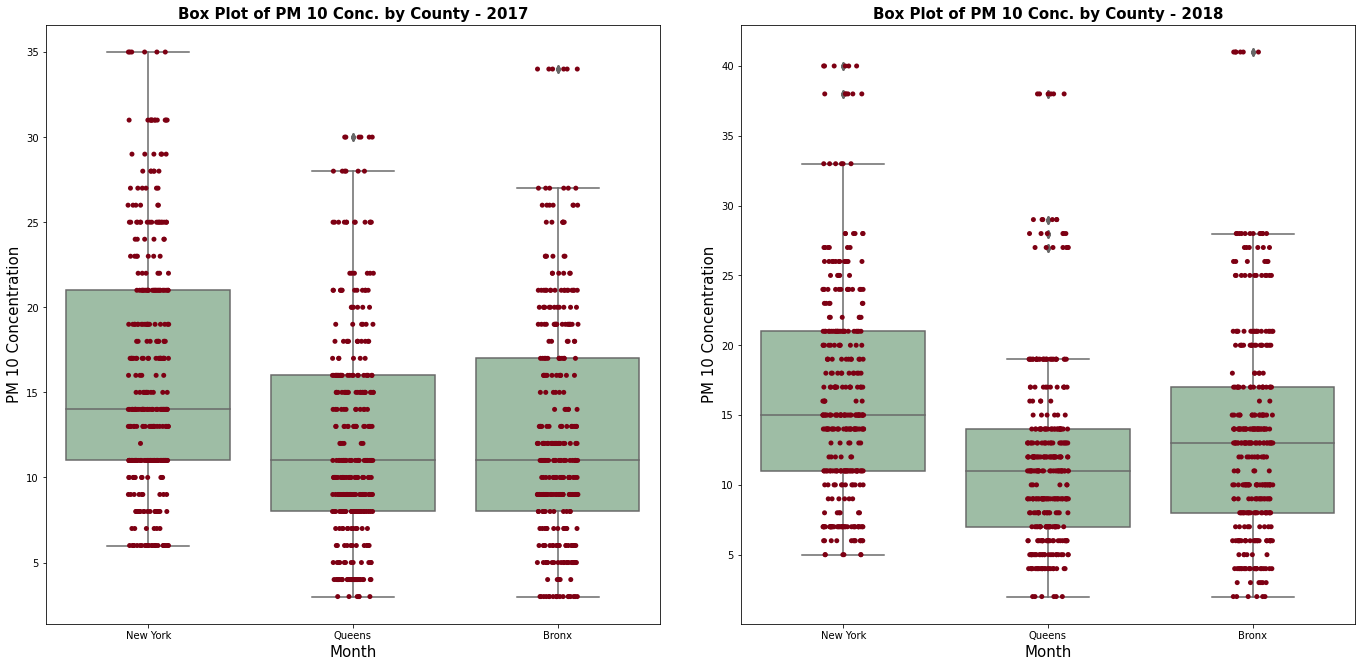

______________________________________________________________________________________________________________


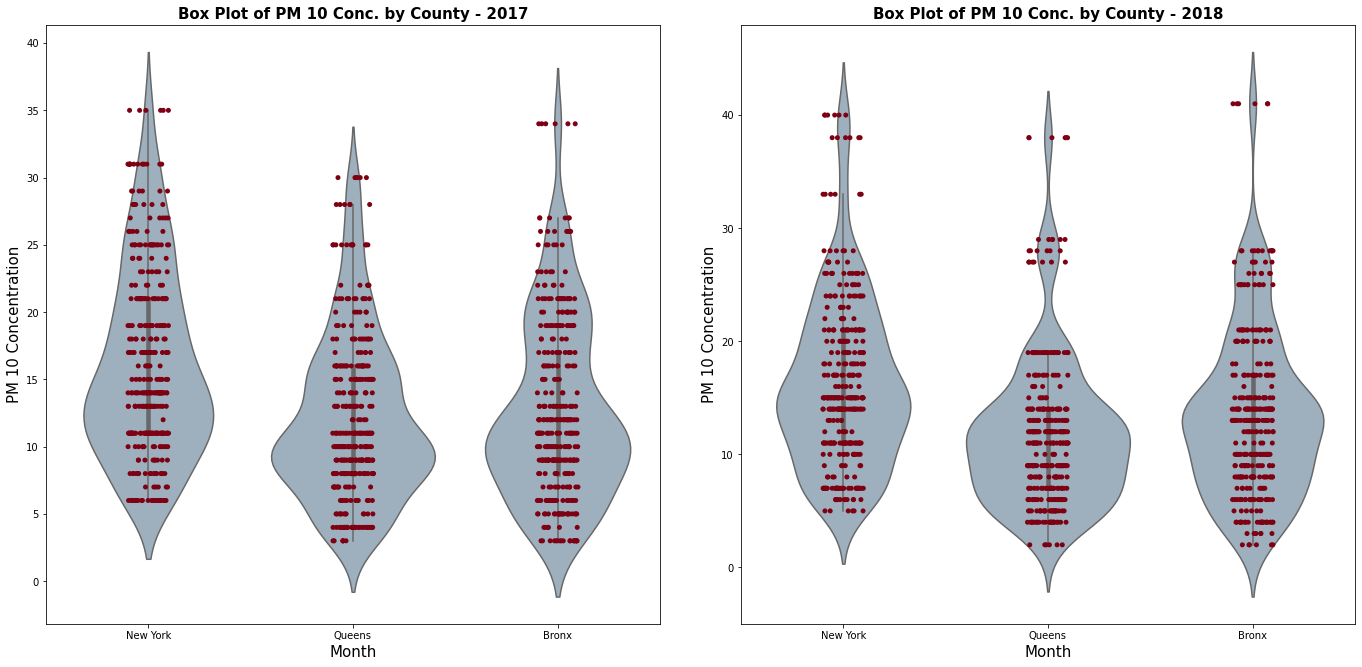

In [18]:
# Box Plots
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sns.boxplot(x = "COUNTY", y = "AQI_CONC", data = PM10_2017, color = "#99c2a2", ax = ax1, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = PM10_2017, color = "#7d0013", marker = "o", size = 5, ax = ax1, orient = "v")
ax1.set_title("Box Plot of PM 10 Conc. by County - 2017", fontweight = "bold", size = 15)
ax1.set_ylabel("PM 10 Concentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)

sns.boxplot(x = "COUNTY", y = "AQI_CONC", data = PM10_2018, color = "#99c2a2", ax = ax2, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = PM10_2018, color = "#7d0013", marker = "o", size = 5, ax = ax2, orient = "v")
ax2.set_title("Box Plot of PM 10 Conc. by County - 2018", fontweight = "bold", size = 15)
ax2.set_ylabel("PM 10 Concentration", fontsize = 15)
ax2.set_xlabel("Month", fontsize = 15)
plt.show()

print(BOLD.B_start+"______________________________________________________________________________________________________________"+BOLD.B_end)
# Violin Plots

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sns.violinplot(x = "COUNTY", y = "AQI_CONC", data = PM10_2017, color = "#99b1c2", ax = ax1, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = PM10_2017, color = "#7d0013", marker = "o", size = 5, ax = ax1, orient = "v")
ax1.set_title("Box Plot of PM 10 Conc. by County - 2017", fontweight = "bold", size = 15)
ax1.set_ylabel("PM 10 Concentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)

sns.violinplot(x = "COUNTY", y = "AQI_CONC", data = PM10_2018, color = "#99b1c2", ax = ax2, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = PM10_2018, color = "#7d0013", marker = "o", size = 5, ax = ax2, orient = "v")
ax2.set_title("Box Plot of PM 10 Conc. by County - 2018", fontweight = "bold", size = 15)
ax2.set_ylabel("PM 10 Concentration", fontsize = 15)
ax2.set_xlabel("Month", fontsize = 15)
plt.show()

### T-Tests & ANOVA Tests (2017, 2018)

In [20]:
# T-Test comparison by variables

# The Pr(>F) column is the p value of the F statistic. 
# This shows how likely it is that the F value calculated from the test would have occurred if the null 
# hypothesis of no difference among group means were true.

#2017
print(BOLD.B_start+UNDERLINE.U_start+"T-Test - PM 10 2017"+UNDERLINE.U_end+BOLD.B_end)
print("NY vs. Bronx - PM 10 2017")
fvalue, pvalue = stats.ttest_ind(NY_PM10_2017["AQI_CONC"],BRONX_PM10_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Queens vs. Bronx - PM 10 2017")
fvalue, pvalue = stats.ttest_ind(QUEENS_PM10_2017["AQI_CONC"],BRONX_PM10_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Queens vs. NY - PM 10 2017")
fvalue, pvalue = stats.ttest_ind(QUEENS_PM10_2017["AQI_CONC"],NY_PM10_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

# Ordinary Least Squares (OLS) model
print(BOLD.B_start+UNDERLINE.U_start+"ANOVA - PM 10 2017"+UNDERLINE.U_end+BOLD.B_end)
anova_df = pd.DataFrame()
anova_df = pd.concat([NY_PM10_2017["AQI_CONC"].reset_index(drop = True, inplace = False),
                QUEENS_PM10_2017["AQI_CONC"].reset_index(drop = True, inplace = False),
                BRONX_PM10_2017["AQI_CONC"].reset_index(drop = True, inplace = False)], axis = 1, ignore_index = True)
anova_df = anova_df.rename(columns = {0:"NY",1:"Queens",2:"Bronx"})
moore_lm = ols("""Bronx ~ Bronx + Queens + NY + Bronx:NY + Bronx:Queens + Queens:NY""", data = anova_df).fit()
anova_table = sm.stats.anova_lm(moore_lm, typ = 2)
print(anova_table)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

#2018
print(BOLD.B_start+UNDERLINE.U_start+"T-Test - PM 10 2018"+UNDERLINE.U_end+BOLD.B_end)
print("NY vs. Bronx - PM 10 2018")
fvalue, pvalue = stats.ttest_ind(NY_PM10_2018["AQI_CONC"],BRONX_PM10_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Queens vs. Bronx - PM 10 2018")
fvalue, pvalue = stats.ttest_ind(QUEENS_PM10_2018["AQI_CONC"],BRONX_PM10_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Queens vs. NY - PM 10 2018")
fvalue, pvalue = stats.ttest_ind(QUEENS_PM10_2018["AQI_CONC"],NY_PM10_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

# Ordinary Least Squares (OLS) model
print(BOLD.B_start+UNDERLINE.U_start+"ANOVA - PM 10 2018"+UNDERLINE.U_end+BOLD.B_end)
anova_df = pd.DataFrame()
anova_df = pd.concat([NY_PM10_2018["AQI_CONC"].reset_index(drop = True, inplace = False),
                QUEENS_PM10_2018["AQI_CONC"].reset_index(drop = True, inplace = False),
                BRONX_PM10_2018["AQI_CONC"].reset_index(drop = True, inplace = False)], axis = 1, ignore_index = True)
anova_df = anova_df.rename(columns = {0:"NY",1:"Queens",2:"Bronx"})
moore_lm = ols("""Bronx ~ Bronx + Queens + NY + Bronx:NY + Bronx:Queens + Queens:NY""", data = anova_df).fit()
anova_table = sm.stats.anova_lm(moore_lm, typ = 2)
print(anova_table)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"T-Test - PM 10 All Years"+UNDERLINE.U_end+BOLD.B_end)
print("2017 vs. 2018 - PM 10")
fvalue, pvalue = stats.ttest_ind(PM10_2017_MEAN["AQI_CONC"],PM10_2018_MEAN["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

T-Test - PM 10 2017
NY vs. Bronx - PM 10 2017
t-Value: 6.8131 p-Value: 2.003575627212956e-11


Queens vs. Bronx - PM 10 2017
t-Value: -1.1121 p-Value: 0.26647730506881934


Queens vs. NY - PM 10 2017
t-Value: -8.1847 p-Value: 1.2187446478507987e-15


ANOVA - PM 10 2017
                    sum_sq     df             F    PR(>F)
Bronx         5.106093e+03    1.0  1.461205e+29  0.000000
Queens        8.864884e-26    1.0  2.536855e+00  0.112099
NY            5.257854e-29    1.0  1.504635e-03  0.969080
Bronx:NY      2.434317e-28    1.0  6.966262e-03  0.933529
Bronx:Queens  7.647854e-27    1.0  2.188579e-01  0.640196
Queens:NY     0.000000e+00    1.0  0.000000e+00  1.000000
Residual      1.251009e-23  358.0           NaN       NaN
_________________________________________________________________________________


T-Test - PM 10 2018
NY vs. Bronx - PM 10 2018
t-Value: 4.9525 p-Value: 9.115472604256298e-07


Queens vs. Bronx - PM 10 2018
t-Value: -3.263 p-Value: 0.0011539788471871912


Queens v

### Histograms w/Curve Fitting (2017, 2018)

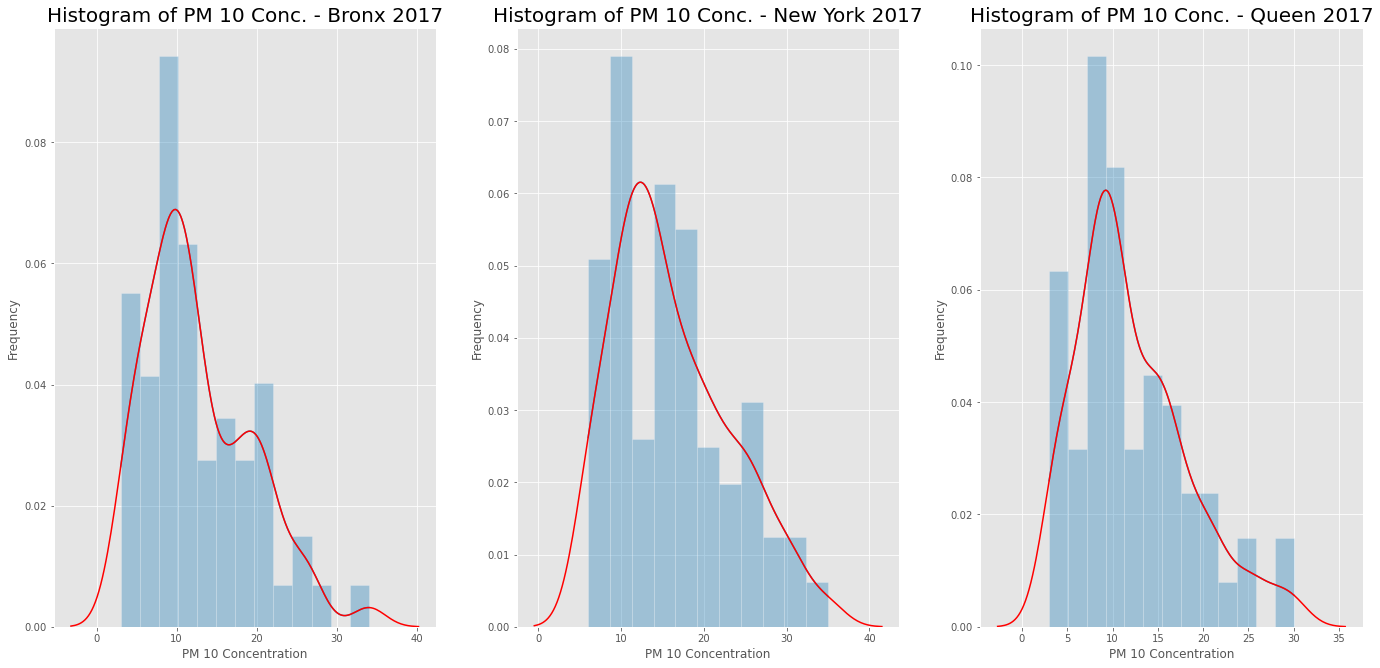

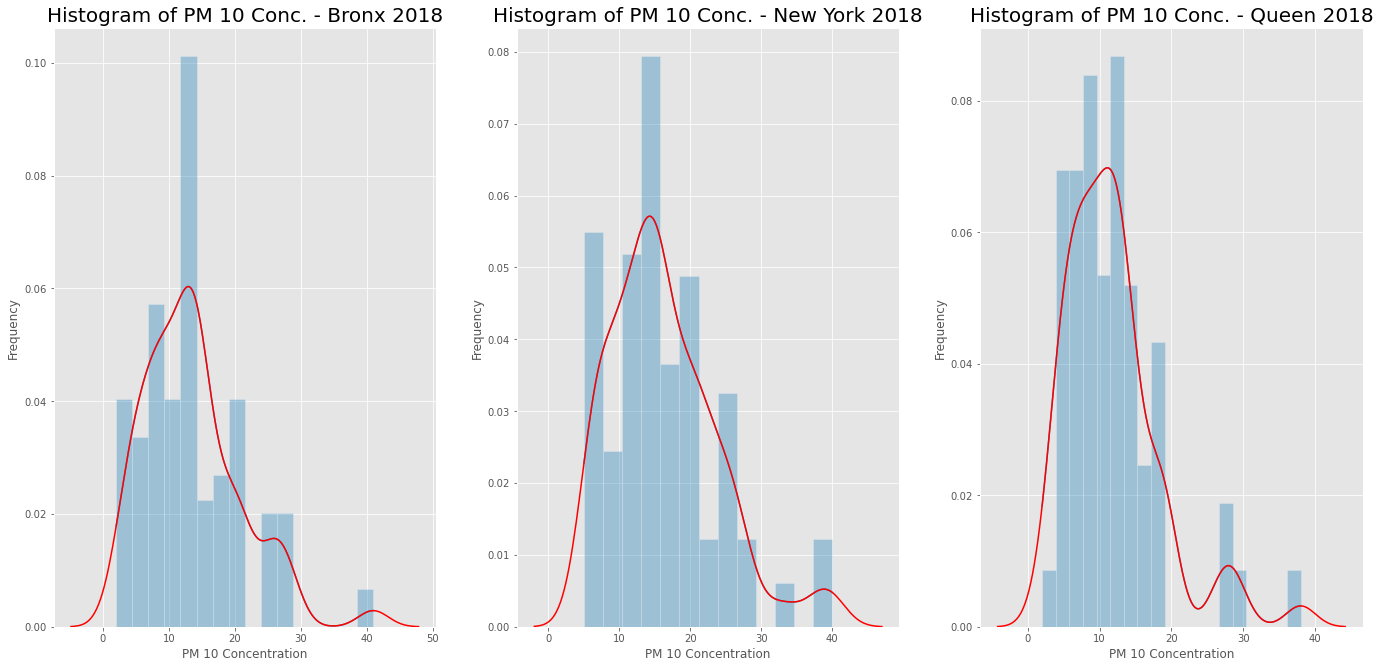



Shapiro-Wilk Test for Normality


,AQI,County,Year,Statistic,p-Value
0,PM 10,Bronx,2017,0.935451,1.750444e-11
1,PM 10,New York,2017,0.944895,2.065469e-10
2,PM 10,Queens,2017,0.932424,8.344713e-12
3,PM 10,Bronx,2018,0.925849,1.796033e-12
4,PM 10,New York,2018,0.931746,7.091386e-12
5,PM 10,Queens,2018,0.872478,8.830567e-17


D’Agostino and Pearson Test for Normality


,AQI,County,Year,Statistic,p-Value
0,PM 10,Bronx,2017,35.113741,2.372182e-08
1,PM 10,New York,2017,24.003458,6.133598e-06
2,PM 10,Queens,2017,38.553503,4.248280e-09
3,PM 10,Bronx,2018,65.264910,6.728291e-15
4,PM 10,New York,2018,48.660759,2.713004e-11
5,PM 10,Queens,2018,113.683303,2.060556e-25


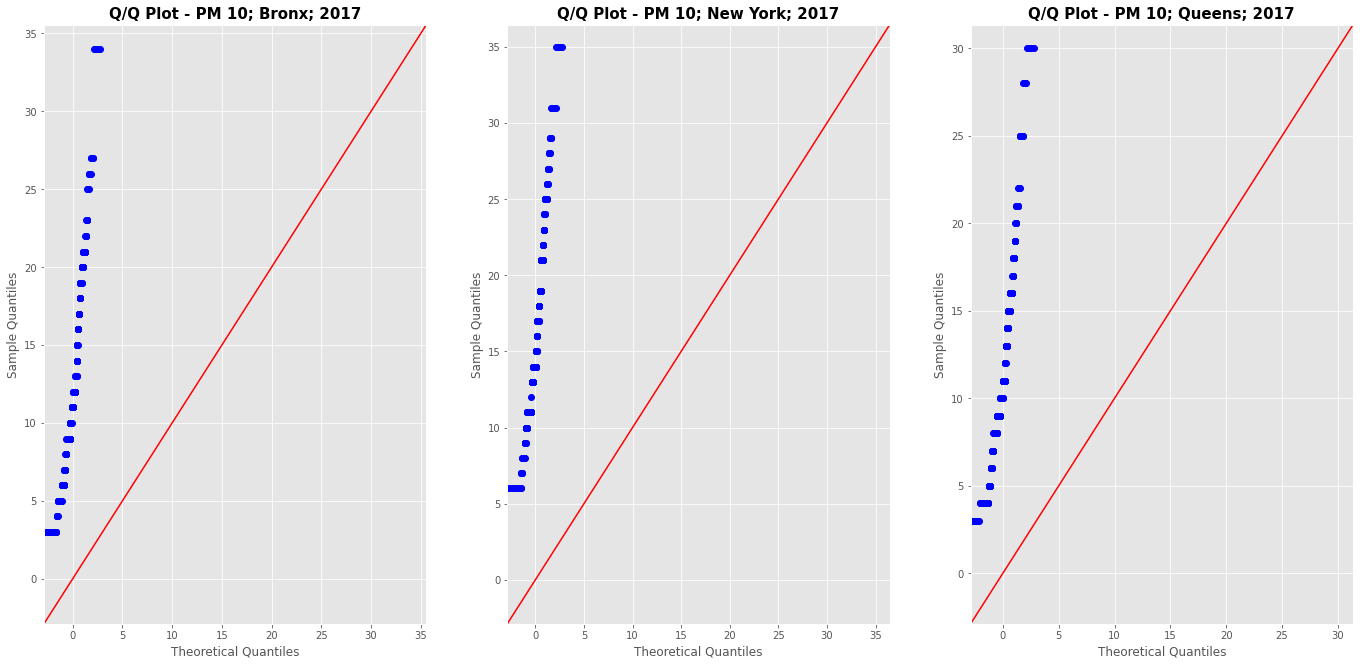

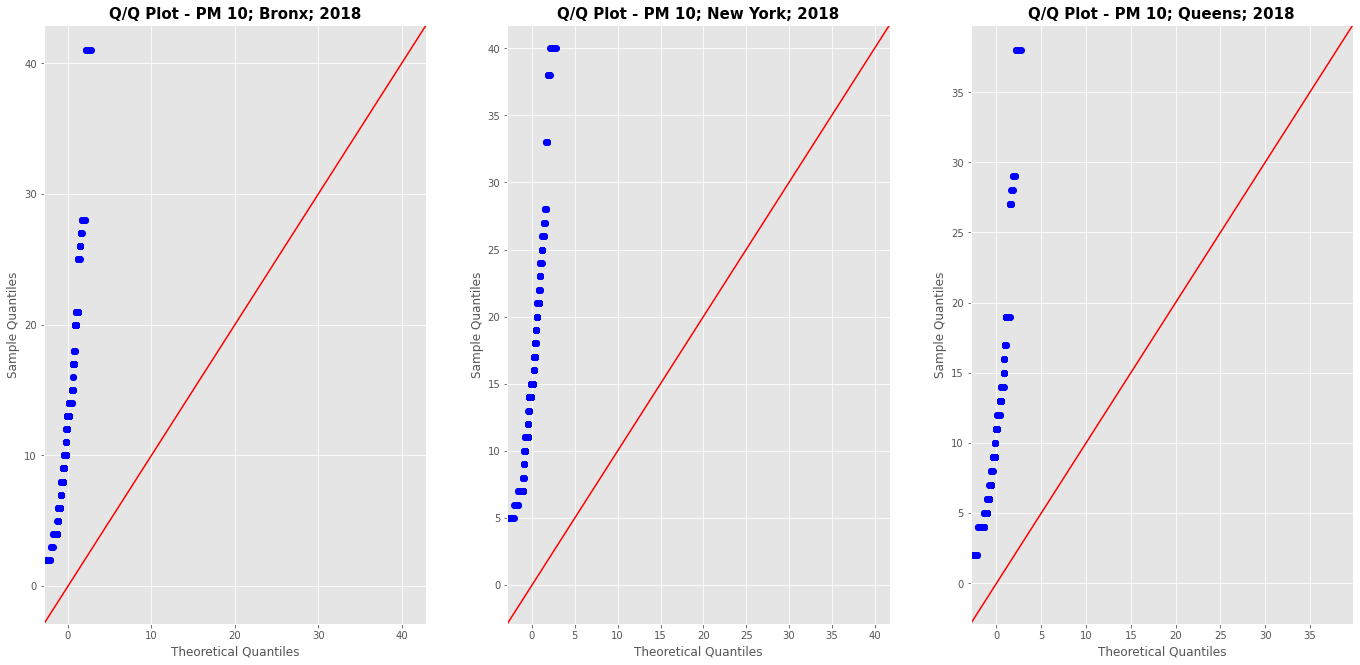

In [24]:
# 2017
plt.style.use("ggplot")
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
fig.tight_layout(pad = 5.0)

# "Histogram of PM 10 Concentration for Bronx County w/Curve Fit - 2017"
sns.histplot(BRONX_PM10_2017["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax1)
sns.kdeplot(data = BRONX_PM10_2017, x = "AQI_CONC", color = "red", ax = ax1)
ax1.set_xlabel("PM 10 Concentration", fontsize = 12)
ax1.set_ylabel("Frequency", fontsize = 12)
ax1.set_title("Histogram of PM 10 Conc. - Bronx 2017", fontsize = 20)

# "Histogram of PM 10 Concentration for New York County w/Curve Fit - 2017"
sns.histplot(NY_PM10_2017["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax2)
sns.kdeplot(data = NY_PM10_2017, x = "AQI_CONC", color = "red", ax = ax2)
ax2.set_xlabel("PM 10 Concentration", fontsize = 12)
ax2.set_ylabel("Frequency", fontsize = 12)
ax2.set_title("Histogram of PM 10 Conc. - New York 2017", fontsize = 20)

# "Histogram of PM 10 Concentration for Queens County w/Curve Fit - 2017"
sns.histplot(QUEENS_PM10_2017["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax3)
sns.kdeplot(data = QUEENS_PM10_2017, x = "AQI_CONC", color = "red", ax = ax3)
ax3.set_xlabel("PM 10 Concentration", fontsize = 12)
ax3.set_ylabel("Frequency", fontsize = 12)
ax3.set_title("Histogram of PM 10 Conc. - Queen 2017", fontsize = 20)
plt.show()

print("\n")

###############################################################################################################

# 2018
plt.style.use("ggplot")
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
fig.tight_layout(pad = 5.0)

# "Histogram of PM 10 Concentration for Bronx County w/Curve Fit - 2018"
sns.histplot(BRONX_PM10_2018["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax1)
sns.kdeplot(data = BRONX_PM10_2018, x = "AQI_CONC", color = "red", ax = ax1)
ax1.set_xlabel("PM 10 Concentration", fontsize = 12)
ax1.set_ylabel("Frequency", fontsize = 12)
ax1.set_title("Histogram of PM 10 Conc. - Bronx 2018", fontsize = 20)

# "Histogram of PM 10 Concentration for New York County w/Curve Fit - 2018"
sns.histplot(NY_PM10_2018["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax2)
sns.kdeplot(data = NY_PM10_2018, x = "AQI_CONC", color = "red", ax = ax2)
ax2.set_xlabel("PM 10 Concentration", fontsize = 12)
ax2.set_ylabel("Frequency", fontsize = 12)
ax2.set_title("Histogram of PM 10 Conc. - New York 2018", fontsize = 20)

# "Histogram of PM 10 Concentration for Queens County w/Curve Fit - 2018"
sns.histplot(QUEENS_PM10_2018["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax3)
sns.kdeplot(data = QUEENS_PM10_2018, x = "AQI_CONC", color = "red", ax = ax3)
ax3.set_xlabel("PM 10 Concentration", fontsize = 12)
ax3.set_ylabel("Frequency", fontsize = 12)
ax3.set_title("Histogram of PM 10 Conc. - Queen 2018", fontsize = 20)
plt.show()

print("\n")

###############################################################################################################

# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
# H0 = Data was pulled from a normal distribution
# HT = Data was NOT pulled from a normal distribution
# The Shapiro-Wilk test rejects the null hypothesis of normality when the p-value is less than or equal to 0.05

shapiro_df = pd.DataFrame({})
print(BOLD.B_start+UNDERLINE.U_start+"Shapiro-Wilk Test for Normality"+UNDERLINE.U_end+BOLD.B_end)
shapiro_df = shapiro_df.append([{"AQI":"PM 10","County":"Bronx","Year":2017,"Statistic":stats.shapiro(BRONX_PM10_2017["AQI_CONC"]).statistic,"p-Value":stats.shapiro(BRONX_PM10_2017["AQI_CONC"]).pvalue},
                {"AQI":"PM 10","County":"New York","Year":2017,"Statistic":stats.shapiro(NY_PM10_2017["AQI_CONC"]).statistic,"p-Value":stats.shapiro(NY_PM10_2017["AQI_CONC"]).pvalue},
                {"AQI":"PM 10","County":"Queens","Year":2017,"Statistic":stats.shapiro(QUEENS_PM10_2017["AQI_CONC"]).statistic,"p-Value":stats.shapiro(QUEENS_PM10_2017["AQI_CONC"]).pvalue},
                {"AQI":"PM 10","County":"Bronx","Year":2018,"Statistic":stats.shapiro(BRONX_PM10_2018["AQI_CONC"]).statistic,"p-Value":stats.shapiro(BRONX_PM10_2018["AQI_CONC"]).pvalue},
                {"AQI":"PM 10","County":"New York","Year":2018,"Statistic":stats.shapiro(NY_PM10_2018["AQI_CONC"]).statistic,"p-Value":stats.shapiro(NY_PM10_2018["AQI_CONC"]).pvalue},
                {"AQI":"PM 10","County":"Queens","Year":2018,"Statistic":stats.shapiro(QUEENS_PM10_2018["AQI_CONC"]).statistic,"p-Value":stats.shapiro(QUEENS_PM10_2018["AQI_CONC"]).pvalue}], ignore_index = True)
display(shapiro_df)

###############################################################################################################

# D’Agostino and Pearson Test for Normality
# Normal Test - Tests whether a sample differs from a normal distribution.
# This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D’Agostino and Pearson’s [1], [2] test that combines skew and kurtosis to produce an omnibus test of normality.
# If the p-val is very small, it means it is unlikely that the data came from a normal distribution.

normality_df = pd.DataFrame()
print(BOLD.B_start+UNDERLINE.U_start+"D’Agostino and Pearson Test for Normality"+UNDERLINE.U_end+BOLD.B_end)
normality_df = normality_df.append([{"AQI":"PM 10","County":"Bronx","Year":2017,"Statistic":stats.normaltest(BRONX_PM10_2017["AQI_CONC"]).statistic,"p-Value":stats.normaltest(BRONX_PM10_2017["AQI_CONC"]).pvalue},
                                   {"AQI":"PM 10","County":"New York","Year":2017,"Statistic":stats.normaltest(NY_PM10_2017["AQI_CONC"]).statistic,"p-Value":stats.normaltest(NY_PM10_2017["AQI_CONC"]).pvalue},
                                   {"AQI":"PM 10","County":"Queens","Year":2017,"Statistic":stats.normaltest(QUEENS_PM10_2017["AQI_CONC"]).statistic,"p-Value":stats.normaltest(QUEENS_PM10_2017["AQI_CONC"]).pvalue},
                                   {"AQI":"PM 10","County":"Bronx","Year":2018,"Statistic":stats.normaltest(BRONX_PM10_2018["AQI_CONC"]).statistic,"p-Value":stats.normaltest(BRONX_PM10_2018["AQI_CONC"]).pvalue},
                                   {"AQI":"PM 10","County":"New York","Year":2018,"Statistic":stats.normaltest(NY_PM10_2018["AQI_CONC"]).statistic,"p-Value":stats.normaltest(NY_PM10_2018["AQI_CONC"]).pvalue},
                                   {"AQI":"PM 10","County":"Queens","Year":2018,"Statistic":stats.normaltest(QUEENS_PM10_2018["AQI_CONC"]).statistic,"p-Value":stats.normaltest(QUEENS_PM10_2018["AQI_CONC"]).pvalue}], ignore_index = True)
display(normality_df)
print("\n")
###############################################################################################################

# Q/Q Plot
# Normal Test - Tests whether a sample differs from a normal distribution.
# This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D’Agostino and Pearson’s [1], [2] test that combines skew and kurtosis to produce an omnibus test of normality.
# If the p-val is very small, it means it is unlikely that the data came from a normal distribution.

#2017
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sm.qqplot(BRONX_PM10_2017["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax1)
ax1.set_title("Q/Q Plot - PM 10; Bronx; 2017", fontweight = "bold", size = 15)
sm.qqplot(NY_PM10_2017["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax2)
ax2.set_title("Q/Q Plot - PM 10; New York; 2017", fontweight = "bold", size = 15)
sm.qqplot(QUEENS_PM10_2017["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax3)
ax3.set_title("Q/Q Plot - PM 10; Queens; 2017", fontweight = "bold", size = 15)
plt.style.use("ggplot")
plt.show()

#2018
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sm.qqplot(BRONX_PM10_2018["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax1)
ax1.set_title("Q/Q Plot - PM 10; Bronx; 2018", fontweight = "bold", size = 15)
sm.qqplot(NY_PM10_2018["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax2)
ax2.set_title("Q/Q Plot - PM 10; New York; 2018", fontweight = "bold", size = 15)
sm.qqplot(QUEENS_PM10_2018["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax3)
ax3.set_title("Q/Q Plot - PM 10; Queens; 2018", fontweight = "bold", size = 15)
plt.style.use("ggplot")
plt.show()

### Min & Max Values & Dates 

In [26]:
# 2017 Min
print(BOLD.B_start+UNDERLINE.U_start+"Minimum AQI Conc. & Date - 2017"+UNDERLINE.U_end+BOLD.B_end)
BRONX_PM10_2017_MIN = BRONX_PM10_2017[BRONX_PM10_2017["AQI_CONC"] == BRONX_PM10_2017["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_PM10_2017_MIN = BRONX_PM10_2017_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_PM10_2017_MIN)
NY_PM10_2017_MIN = NY_PM10_2017[NY_PM10_2017["AQI_CONC"] == NY_PM10_2017["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
NY_PM10_2017_MIN = NY_PM10_2017_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(NY_PM10_2017_MIN)
QUEENS_PM10_2017_MIN = QUEENS_PM10_2017[QUEENS_PM10_2017["AQI_CONC"] == QUEENS_PM10_2017["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_PM10_2017_MIN = QUEENS_PM10_2017_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_PM10_2017_MIN)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)

# 2017 Max
print(BOLD.B_start+UNDERLINE.U_start+"Maximum AQI Conc. & Date - 2017"+UNDERLINE.U_end+BOLD.B_end)
BRONX_PM10_2017_MAX = BRONX_PM10_2017[BRONX_PM10_2017["AQI_CONC"] == BRONX_PM10_2017["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_PM10_2017_MAX = BRONX_PM10_2017_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_PM10_2017_MAX)
NY_PM10_2017_MAX = NY_PM10_2017[NY_PM10_2017["AQI_CONC"] == NY_PM10_2017["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
NY_PM10_2017_MAX = NY_PM10_2017_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(NY_PM10_2017_MAX)
QUEENS_PM10_2017_MAX = QUEENS_PM10_2017[QUEENS_PM10_2017["AQI_CONC"] == QUEENS_PM10_2017["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_PM10_2017_MAX = QUEENS_PM10_2017_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_PM10_2017_MAX)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)

# 2018 Min
print(BOLD.B_start+UNDERLINE.U_start+"Minimum AQI Conc. & Date - 2018"+UNDERLINE.U_end+BOLD.B_end)
BRONX_PM10_2018_MIN = BRONX_PM10_2018[BRONX_PM10_2018["AQI_CONC"] == BRONX_PM10_2018["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_PM10_2018_MIN = BRONX_PM10_2018_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_PM10_2018_MIN)
NY_PM10_2018_MIN = NY_PM10_2018[NY_PM10_2018["AQI_CONC"] == NY_PM10_2018["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
NY_PM10_2018_MIN = NY_PM10_2018_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(NY_PM10_2018_MIN)
QUEENS_PM10_2018_MIN = QUEENS_PM10_2018[QUEENS_PM10_2018["AQI_CONC"] == QUEENS_PM10_2018["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_PM10_2018_MIN = QUEENS_PM10_2018_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_PM10_2018_MIN)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)

# 2018 Max
print(BOLD.B_start+UNDERLINE.U_start+"Maximum AQI Conc. & Date - 2018"+UNDERLINE.U_end+BOLD.B_end)
BRONX_PM10_2018_MAX = BRONX_PM10_2018[BRONX_PM10_2018["AQI_CONC"] == BRONX_PM10_2018["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_PM10_2018_MAX = BRONX_PM10_2018_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_PM10_2018_MAX)
NY_PM10_2018_MAX = NY_PM10_2018[NY_PM10_2018["AQI_CONC"] == NY_PM10_2018["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
NY_PM10_2018_MAX = NY_PM10_2018_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(NY_PM10_2018_MAX)
QUEENS_PM10_2018_MAX = QUEENS_PM10_2018[QUEENS_PM10_2018["AQI_CONC"] == QUEENS_PM10_2018["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_PM10_2018_MAX = QUEENS_PM10_2018_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_PM10_2018_MAX)

Minimum AQI Conc. & Date - 2017


,DATE,AQI_CONC,AQI_UNITS,COUNTY
815,2017-03-27,3,ug/m3 SC,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
67,2017-03-09,6,ug/m3 SC,New York


,DATE,AQI_CONC,AQI_UNITS,COUNTY
479,2017-04-25,3,ug/m3 SC,Queens


_________________________________________________________________________________
Maximum AQI Conc. & Date - 2017


,DATE,AQI_CONC,AQI_UNITS,COUNTY
905,2017-06-25,34,ug/m3 SC,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
157,2017-06-07,35,ug/m3 SC,New York


,DATE,AQI_CONC,AQI_UNITS,COUNTY
527,2017-06-12,30,ug/m3 SC,Queens


_________________________________________________________________________________
Minimum AQI Conc. & Date - 2018


,DATE,AQI_CONC,AQI_UNITS,COUNTY
1056,2018-11-23,2,ug/m3 SC,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
320,2018-11-17,5,ug/m3 SC,New York


,DATE,AQI_CONC,AQI_UNITS,COUNTY
702,2018-12-04,2,ug/m3 SC,Queens


_________________________________________________________________________________
Maximum AQI Conc. & Date - 2018


,DATE,AQI_CONC,AQI_UNITS,COUNTY
828,2018-04-09,41,ug/m3 SC,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
98,2018-04-09,40,ug/m3 SC,New York


,DATE,AQI_CONC,AQI_UNITS,COUNTY
468,2018-04-14,38,ug/m3 SC,Queens


### Geospatial Plot

In [ ]:
#display(BRONX_Ozone_2016.head())
ny_map = gpd.read_file('/Users/wwaynerichards/Desktop/Borough Boundaries/geo_export_4bf61b73-3f85-41ef-9ccc-c01719c9f685.shp')
ny_map = ny_map.astype({'boro_code':'int64'}).rename(columns = {"boro_code":"COUNTY"})
display(ny_map)

#fig, ax = plt.subplots(figsize = (15,15))
#ny_map.plot(ax = ax)
#plt.show()

Ozone_2016

geo_df = ny_map.merge(CO_2016, left_on = "COUNTY", how = "left")           
geo_df.head(3)



#crs = {'init':'epsg:4326'}

#geometry = [Polygon(xy) for xy in zip(BRONX_CO_2016["SITE_LONGITUDE"], BRONX_CO_2016["SITE_LATITUDE"])]
#display()

#geo_df = gpd.GeoDataFrame(BRONX_CO_2016, crs = crs, geometry = geometry)
#geo_df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
geoplot.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax=ax, markersize=20, color='blue', marker='o', label = 'Neg')
plt.legend(prop = {'size':15})
plt.show()